In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
n =4

# rectangle (homogeneous coordinates)
b = np.array([[0,2,0,2],[0,0,1,1],[1,1,1,1]])

# trapezoid (homogeneous coordinates)
a = np.array([[0,2,0,2],[0,0,1,2],[1,1,1,1]])

print(a,'\n\n',b)

[[0 2 0 2]
 [0 0 1 2]
 [1 1 1 1]] 

 [[0 2 0 2]
 [0 0 1 1]
 [1 1 1 1]]


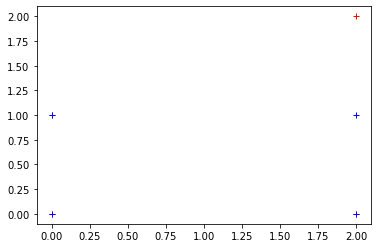

In [10]:
plt.plot(a[0,:],a[1,:],'r+')
plt.plot(b[0,:],b[1,:],'b+')
plt.show()

In [11]:
# Construct the homography matrix
block1 = np.zeros((2*n,3))
block1[::2] = np.transpose(a)

print(block1)

block2 = np.zeros((2*n,3))
block2[1::2] = np.transpose(a)

print('\n',block2)

block3 = np.zeros((2*n,3))

for i in range(n):
    block3[2*i,:] =  np.array([-b[0,i]*a[:,i]])
    block3[2*i+1,:] = np.array([-b[1,i]*a[:,i]])
    
print('\n',block3)
    
A = np.concatenate((block1,block2,block3),axis=1)

[[0. 0. 1.]
 [0. 0. 0.]
 [2. 0. 1.]
 [0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]
 [2. 2. 1.]
 [0. 0. 0.]]

 [[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [2. 0. 1.]
 [0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 0.]
 [2. 2. 1.]]

 [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-4.  0. -2.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0. -1. -1.]
 [-4. -4. -2.]
 [-2. -2. -1.]]


In [12]:
u, s, vh = np.linalg.svd(np.dot(np.transpose(A),A), full_matrices=True)
print(u[:,8])

v = np.reshape(u[:,8],(3,3))

print(v)

[ 8.00000000e-01  2.62937106e-16 -3.33807770e-16  1.70887336e-15
  4.00000000e-01 -2.09481160e-15  2.00000000e-01  3.90059784e-16
  4.00000000e-01]
[[ 8.00000000e-01  2.62937106e-16 -3.33807770e-16]
 [ 1.70887336e-15  4.00000000e-01 -2.09481160e-15]
 [ 2.00000000e-01  3.90059784e-16  4.00000000e-01]]


In [37]:
q = np.dot(v,a)
print(q)

p = q[2,:];

xx = np.divide(q[0,:],p)
yy = np.divide(q[1,:],p)

y = np.zeros((2,n))
y[0,:] = xx
y[1,:] = yy

print(y)

[[-3.33807770e-16  1.60000000e+00 -7.08706646e-17  1.60000000e+00]
 [-2.09481160e-15  1.32293513e-15  4.00000000e-01  8.00000000e-01]
 [ 4.00000000e-01  8.00000000e-01  4.00000000e-01  8.00000000e-01]]
[[-8.34519425e-16  2.00000000e+00 -1.77176662e-16  2.00000000e+00]
 [-5.23702901e-15  1.65366891e-15  1.00000000e+00  1.00000000e+00]]


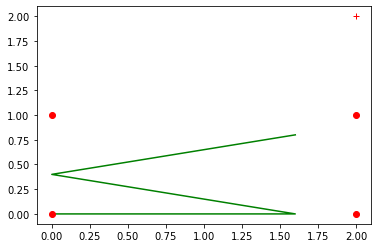

In [43]:
plt.plot(q[0,:],q[1,:],'g')
plt.plot(a[0,:],a[1,:],'r+')
plt.plot(b[0,:],b[1,:],'b+')
plt.plot(y[0,:],y[1,:],'ro')
plt.show()